In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


In [3]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

In [4]:
train_dir = 'train'
valid_dir = 'test'
test_dir  = 'test'

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(75,75), batch_size=8, class_mode='categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [9]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기 :', data_batch.shape)
  print('배치 레이블 크기 :', labels_batch.shape)
  break

배치 데이터 크기 : (8, 75, 75, 3)
배치 레이블 크기 : (8, 27)


In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(216, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(518, (3, 3), activation = 'relu'))


model.add(layers.Flatten())
model.add(layers.Dense(27, activation = 'softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 216)       249048    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 216)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 518)        

In [16]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=62, epochs=200, validation_data=valid_generator, validation_steps=22)

Epoch 1/200
62/62 [==============================] - 3s 31ms/step - loss: 3.3310 - accuracy: 0.0365 - val_loss: 3.1235 - val_accuracy: 0.0795
Epoch 2/200
62/62 [==============================] - 1s 23ms/step - loss: 3.0188 - accuracy: 0.0977 - val_loss: 2.8145 - val_accuracy: 0.1648
Epoch 3/200
62/62 [==============================] - 1s 24ms/step - loss: 2.6975 - accuracy: 0.1801 - val_loss: 2.6410 - val_accuracy: 0.2443
Epoch 4/200
62/62 [==============================] - 1s 23ms/step - loss: 2.1463 - accuracy: 0.3770 - val_loss: 2.3503 - val_accuracy: 0.3636
Epoch 5/200
62/62 [==============================] - 1s 23ms/step - loss: 1.7259 - accuracy: 0.4903 - val_loss: 2.3345 - val_accuracy: 0.4261
Epoch 6/200
62/62 [==============================] - 1s 23ms/step - loss: 1.2979 - accuracy: 0.5828 - val_loss: 2.4552 - val_accuracy: 0.4034
Epoch 7/200
62/62 [==============================] - 1s 23ms/step - loss: 0.8670 - accuracy: 0.7564 - val_loss: 2.2362 - val_accuracy: 0.5398
Epoch 

In [17]:
loss, accuracy = model.evaluate(test_generator, steps=22)
loss, accuracy

22/22 [==============================] - 0s 13ms/step - loss: 8.8496 - accuracy: 0.5795


(8.849648475646973, 0.5795454382896423)

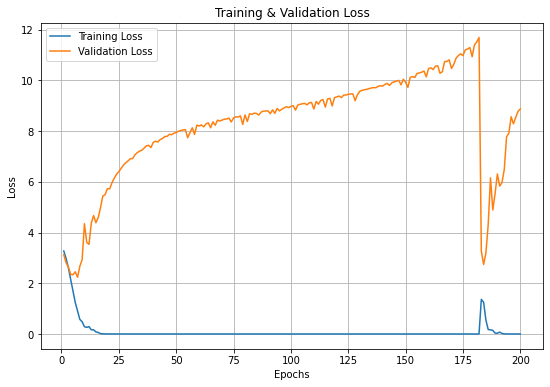

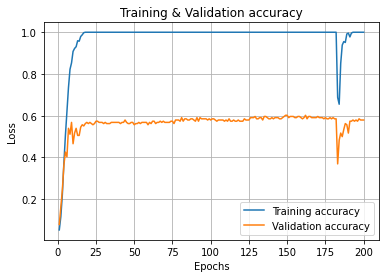

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()